# <span style="color:green"> Numerical Simulation Laboratory - Numerical Exercises 1 </span>

### <span style="color:royalblue"> Comment on the C++ code - Usage </span>
The three C++ programs can be compiled by means of a makefile, which produces the executable **main.exe**. One could also compile and launch directly using the command **make all** or clean the existing output and .o files using **make clean**.<br>
Once the program finishes the computations, the elapsed times of each function call are shown.

## <span style="color:black"> Exercise 01.1 </span>
### <span style="color:royalblue"> Comment on the C++ code - Structure </span>
The C++ code is based on the class **Stat** (stat.h), which contains the statistical methods used in all the following exercises. In particular, it contains the implementation of the blocking methods that return the estimations of the mean and of the standard deviation. The data are stored in a vector (double) container. This class also includes some methods which allow to fill the data vector using some probability distributions (such as the Gaussian, Lorentzian, Uniform...).
### <span style="color:royalblue"> Comment on the Python code </span>
We define here some functions which read and plot the output data produced by the C++ program.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, average, error, fig, ax, plot, plot_err = [None]*7
M, N, bins, chi_array = 0, 0, 0, []

def PlotIntegral(x, average, error, exp_val, fig, ax, plot, xlabel, ylabel, title):
    fig, ax = plt.subplots()
    plot, _, _ = ax.errorbar(x, average-exp_val, yerr=error, color='black', ecolor='darkorange', 
                             label='Progressive average')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.set_title(title)
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    ax.legend(prop={'size': 10})
    fig.set_size_inches(14.5, 5)
    
def ReadChi(filename):
    with open("./Esercizio01.1/chi.out") as file:
        try:
            line = file.readline().split()
            M, L, chi2 = int(line[0]), int(line[1]), float(line[2])
        except:
            print("[ReadChi]: An error occurred (first line)")
        chi_array = []
        for line in file:
            chi_array.append(float(line))
    return M, L, chi_array, chi2

def PlotChi(chi_array, chi2, M, L, bins):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
    fig.suptitle(f"$\chi^2$ Test ({M*L} total samples, {M} blocks of length {L})", y = 0.99, size=14)
    ax[0].plot(np.arange(0, M), chi_array, color='firebrick', alpha=.9, label=r"$\chi^2_k$")
    ax[0].set_title(f"$\chi^2_k$ values")
    ax[0].set_xlabel(f'Blocks, k$\in$[1:{M}]', fontsize=12)
    ax[0].set_ylabel(f"$\chi^2_k$", fontsize=12)
    ax[0].xaxis.grid(True)
    ax[0].yaxis.grid(True)
    ax[0].legend(prop={'size': 16})
    
    ax[1].hist(chi_array, bins, histtype='bar', color='firebrick', alpha=.9, label=f"$\chi^2$ = {chi2}")
    ax[1].set_title(f"$\chi^2$ distribution")
    ax[1].set_xlabel(f'$\chi^2$', fontsize=12)
    ax[1].set_ylabel("Occurrence", fontsize=12)
    ax[1].xaxis.grid(True)
    ax[1].yaxis.grid(True)
    ax[1].legend(prop={'size': 18})
    return fig, ax

### <span style="color:royalblue"> Estimation of the mean </span>
The following picture represents the displacement of the progressive mean $\mu$ from the expected value (0.5) as a function of the throws M, which are collected in N blocks (the values M, N chosen in the **main.cpp** file is specified in the title of the plot). The standard error of each block is also showed.

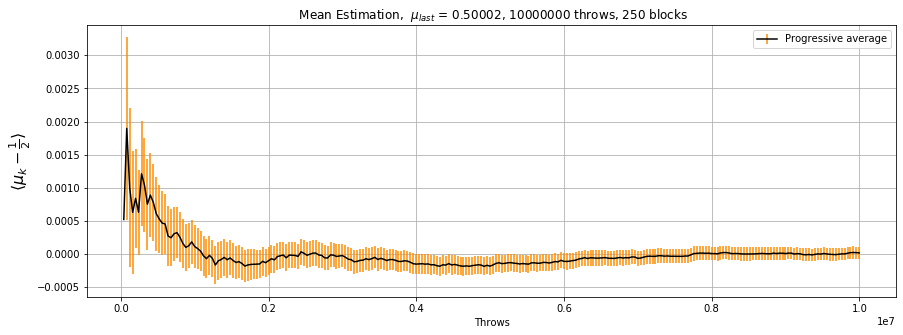

In [2]:
exp_val = 0.5
x, average, error = np.loadtxt("./Esercizio01.1/average.out", usecols=(0, 1, 2), delimiter=' ', unpack='true')

PlotIntegral(x, average, error, exp_val, fig, ax, plot, \
             'Throws', r'$\langle \mu_k-\frac{1}{2} \rangle$', \
             f' Mean Estimation, '+r' $\mu_{last}$'+f' = {average[len(average)-1]:.5f}'+
             f', {int(x[len(x)-1])} throws, {int(x[len(x)-1]/x[0])} blocks')
plt.show()

### <span style="color:royalblue"> Estimation of the variance </span>
In a similar fashion, we represent the displacement of the variance $\sigma^2$ from the expected value (0.5) (with its error) as a function of the throws M, which are collected in N blocks (the values M, N chosen in the **main.cpp** file is specified in the title of the plot).

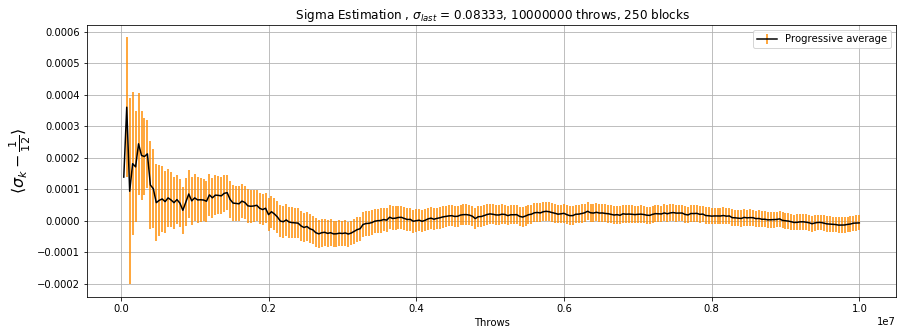

In [3]:
exp_val = 1/12
x, average, error = np.loadtxt("./Esercizio01.1/error.out", usecols=(0, 1, 2), delimiter=' ', unpack='true')

PlotIntegral(x, average, error, exp_val, fig, ax, plot, \
             'Throws', r'$\langle \sigma_k-\frac{1}{12} \rangle$', \
             f' Sigma Estimation '+r', $\sigma_{last}$'+f' = {average[len(average)-1]:.5f}, '+
             f'{int(x[len(x)-1])} throws, {int(x[len(x)-1]/x[0])} blocks')
plt.show()

### <span style="color:royalblue"> Chi squared $\chi^2$ </span>
Here we plot the partial values $\chi^2_k$ as a function of the k-th block and the distribution of $\chi^2$, evaluated for 100 blocks of 10000 values each. The final value of the chi squared is showed in the legend of the second plot. We expect it to be less than the number of blocks used, namely $\chi^2 < 100$.

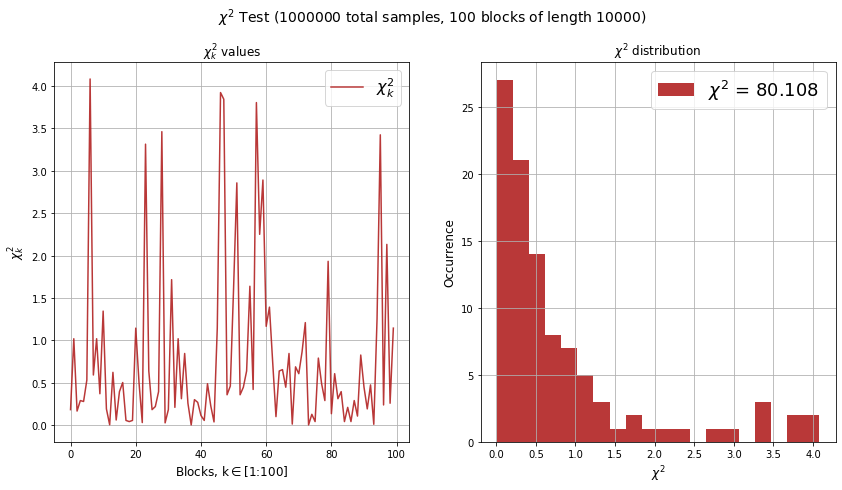

In [4]:
M, N, chi_array, chi2 = ReadChi("Esercizio01.1/chi.out")
Nbins = 20
fig, ax = PlotChi(chi_array, chi2, M, N, Nbins)
plt.show()

## <span style="color:black"> Exercise 01.2 </span>
### <span style="color:royalblue"> Comment on the C++ code - Structure </span>
In this exercise we rely again on the class Stat, which allows to use the blocking methods, and we gather the main functions in the files **auxiliary.h** and **auxiliary.cpp**. In particular, these functions generate the data for each distribution, analyse them and save the final outputs on the file **dice.out**.

### <span style="color:royalblue"> Comment on the Python code </span>
We define here the main functions used in the exercise. In particular, **Fit** performs the fitting of the data with a generic distribution (specified in the first argument). This function is called three times by **Plot**, which produces the final histograms.

In [5]:
from scipy.optimize import curve_fit

### Fitting Functions ###
def gauss(x, norm, mean, sigma):
    return norm * np.exp(-(x-mean)**2/(2*sigma**2))

def lorentz(x, norm, mean, gamma):
    return norm*gamma/((x-mean)**2+gamma**2)

def Fit(f, y, bins, N_fit, xmin, xmax): #Fit in the interval 0, 6. Returns x, y and parameters (norm, mean, gamma)
    x_discrete = np.linspace((xmax-xmin)/bins/2, xmax-(xmax-xmin)/bins/2, bins, endpoint=True) # One for each bin
    p_opt, p_cov = curve_fit(f, x_discrete, y, bounds=([-10,0,0],[10,6,6]))
    x = np.linspace(xmin, xmax, N_fit, endpoint=True)
    y_fit = f(x, p_opt[0], p_opt[1], p_opt[2])
    return x, y_fit, p_opt

### Data Import ###
def Read(filename, Distributions):
    with open(filename) as file:
        # Parameters M, N, n_set, L[]
        M, N, n_set = [int(s.split()[1]) for s in [file.readline() for i in range(0, 3)]]
        s = file.readline().split()
        L = [int(x) for x in s[1:]]  
        # Data
        temp = [[] for i in range(N_dist)]
        for line in file:
            if (line != "\n"): # Single line input -> N_dist Distributions
                v = [float(s) for s in line.split()]
                for d in range(N_dist):
                    temp[d].append(v[d])
            else:
                for d in range(N_dist):
                    Distributions[d].append(temp[d])
                temp = [[], [], []]
        return M, N, n_set, L

### Plot function: histograms and fitting curves ###
def Plot(N_dist, n_set, L, bins, xmin, xmax, fit_mode):
    hist_label = [f'N = {L[i]}' for i in range(n_set)]
    fig, ax = plt.subplots(nrows=1, ncols=N_dist, figsize=(13, 4)) # ax0, ax1, ax2 = axes.flatten()
    y, y_fit, param = [None]*N_dist, [None]*N_dist, [None]*N_dist
    # Draw histograms and fit only the last set (list y[k][n_set-1])
    for k in range(N_dist):
        # y[k_dist][k_set] is the population list of each bin 
        y[k], rr, patch = ax[k].hist(Distributions[k], bins, density=True, histtype='step', linewidth=2, \
                                     stacked=True, align = 'mid', label=hist_label, range=(xmin,xmax))
        # Fitting only the distribution with block_length=100
        x, y_fit[k], param[k] = Fit(fit_mode[k], y[k][n_set-1], bins, N_fit, xmin, xmax) 
        

    hist_title = [f"Uniform distribution [$\mu$={param[0][1]:.3f}, $\sigma$={param[0][2]:.3f}]", \
                   f'Exponential distribution [$\mu$={param[1][1]:.3f}, $\sigma$={param[1][2]:.3f}]', \
                   f'Lorentz distribution [$\mu$={param[2][1]:.3f}, $\Gamma$={param[2][2]:.3f}]']
    for k in range(N_dist):
        ax[k].legend()
        ax[k].set_title(hist_title[k])
        ax[k].plot(x, y_fit[k])
    fig.tight_layout()

The following code can be easily generalized to the case of $N>3$ distributions (however, the C++ code should be partially modified). The essential parameters (x range, the number of bins, the number of points used to represent the fitting curve) can be freely modified, since they are passed as parameters to the functions defined above.<br>
From left to right, we plot the sums generated with a uniform distribution, an exponential distribution and a Lorentz distribution. The first two histograms can be fitted with a Gaussian, while the latter must be fitted with a Lorentz distribution. In particular, the fit is applied to the case N=100, namely when 100 random variables are sampled and summed throwing the corresponding type of dice.

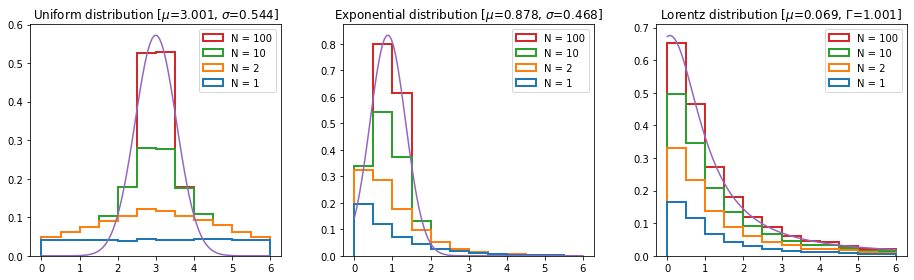

In [6]:
N_dist = 3 # Uniform, Exponential, Lorentz
Distributions = [[] for i in range(N_dist)]

### Read Data ###
M, N, n_set, L = Read("./Esercizio01.2/dice.out", Distributions)

### Free Parameters ###
xmin, xmax = 0, 6
bins, N_fit = 12, 100 # Number of bins, number of points representing the fitting curve

### Plot and Fit Data ###
fit_mode = [gauss, gauss, lorentz] # Fitting Functions
Plot(N_dist, n_set, L, bins, xmin, xmax, fit_mode)
plt.show()

## <span style="color:black"> Exercise 01.3 - Buffon's needle problem </span>
### <span style="color:royalblue"> Comment on the C++ code - Structure </span>
The needles are described by the class **Needle** (needle.h), which provides the methods that check wheter it crosses a line or not. The main computations take place in the code of **auxiliary.cpp**, which generates the needles, the lines of the 2D region and evaluates an estimate of $\pi$. The statistical background is contained as usual in the class **Stat**.<br>
In order to avoid undesired correlations, the generation of the needles relies on the function **Angle()** (contained in the class **Random**) which returns a random angle between $[-\pi, \pi]$ using a rejection method (a random 2D point is generated with coordinates $|x|,|y|<1$ and is discarded if it lies outside the unit circle) and the function atan2(y, x) of C++.

In [7]:
### Definition of functions used below ###
import math
PI = math.pi
x, av_prog, error_prog = [], [], []

def Read(filename, x, av_prog, error_prog, skip_first_lines=0):
    x.clear()
    av_prog.clear()
    error_prog.clear()
    with open(filename) as file:
        M, N = [int(s.split()[1]) for s in [file.readline() for i in range(0, 2)]]
        l, d = [float(s.split()[1]) for s in [file.readline() for i in range(0, 2)]]
        for i in range(skip_first_lines): ## Ignore first ... values
            file.readline()
        for line in file:
            s = line.split(' ')
            x.append(int(s[0]))
            av_prog.append(float(s[1]) - PI)
            error_prog.append(float(s[2]))
    return M, N, l, d

def Plot(x, av_prog, error_prog, xlabel, ylabel, title):
    fig, ax = plt.subplots()
    plot = ax.errorbar(x, av_prog, yerr=error_prog, color='black', ecolor='darkorange')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    ax.set_title(title)
    plot.set_label('Progressive average')
    ax.legend(prop={'size': 10})
    fig.set_size_inches(14.5, 5)
    return fig, ax, plot

We show here the displacement of progressive average $\langle\pi_k\rangle$ from the exact value of $\pi$ with the error bars (using the blocking method). In order to obtain a better-looking plot, we can choose to skip the first lines of the output, thus discarding the worst fraction of data and stretching the graph along the y direction.

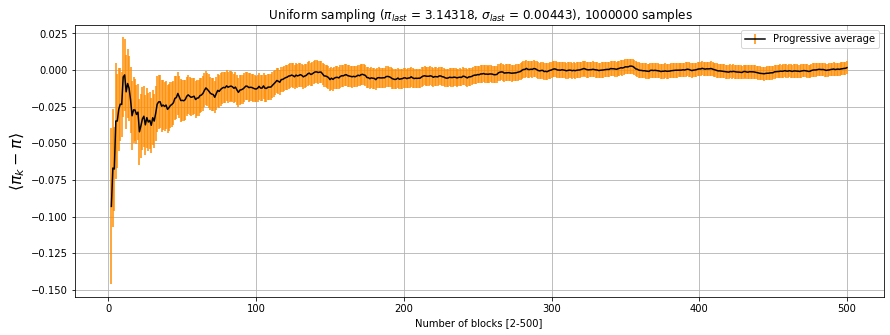

In [8]:
skip_first_lines = 1 # Skip first <n> lines (neither read nor plotted, but the data is left unchanged)

### Read Data ###
M, N, needle_length, line_separation = Read("./Esercizio01.3/buffon.out", x, av_prog, error_prog, skip_first_lines)

### Plot Data ###
fig, ax, plot = Plot(x, av_prog, error_prog,
                     f'Number of blocks [{skip_first_lines+1}-{N}]', r'$\langle \pi_k-\pi \rangle$', 
                     f' Uniform sampling '+r'($\pi_{last}$'+f' = {av_prog[len(av_prog)-1]+PI:.5f}, '
                     +r'$\sigma_{last}$'+f' = {error_prog[len(error_prog)-1]:.5f}), {M} samples')
plt.show()